In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:/Users/parit/Downloads/students.csv")

In [3]:
data.head()

,JEEPRE,JEEMAINS,STATUS
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   JEEPRE    100 non-null    float64
 1   JEEMAINS  100 non-null    float64
 2   STATUS    100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [5]:
data.describe()

,JEEPRE,JEEMAINS,STATUS
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [6]:
data.shape

(100, 3)

In [7]:
data.isnull().sum()

JEEPRE      0
JEEMAINS    0
STATUS      0
dtype: int64

## EDA

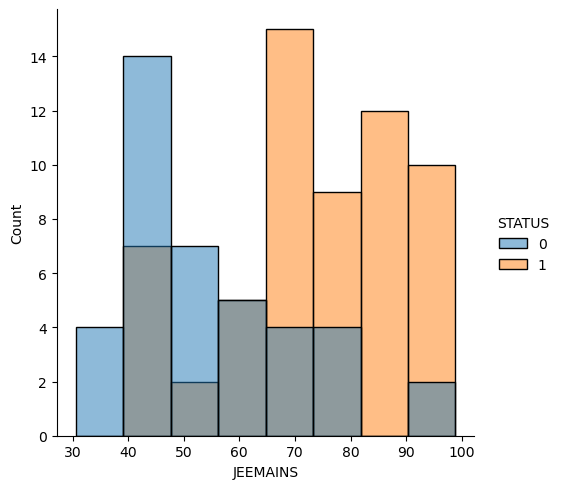

In [8]:
sns.displot(x=data.JEEMAINS,hue=data.STATUS,data=data)

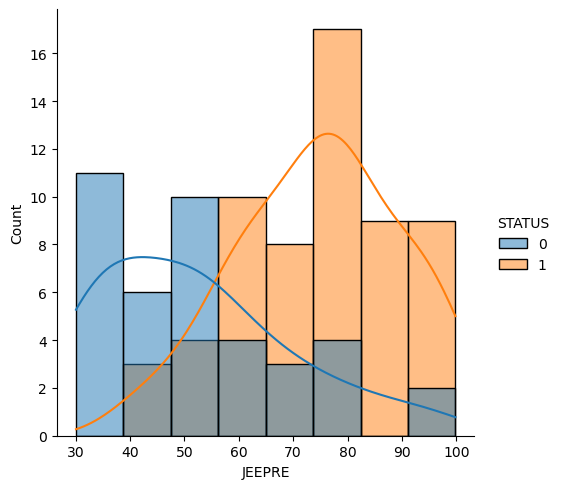

In [9]:
sns.displot(x=data.JEEPRE,hue=data.STATUS,data=data,kde=True)

<Axes: xlabel='JEEMAINS', ylabel='JEEPRE'>

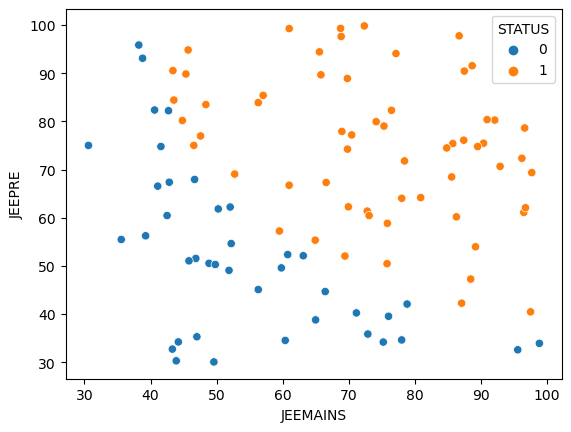

In [10]:
sns.scatterplot(x=data.JEEMAINS,y=data.JEEPRE,hue=data.STATUS,data=data)

In [11]:
x=data[["JEEMAINS","JEEPRE"]]
y=data["STATUS"]

In [12]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
log=LogisticRegression()

In [32]:
model=log.fit(x_train,y_train)

In [33]:
print("model gets trained")

model gets trained


In [34]:
print("accuracy score of training data =",model.score(x_train,y_train))

accuracy score of training data = 0.8875


In [35]:
pred=model.predict(x_test)

In [36]:
pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1],
      dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [38]:
print("accuracy score of testing data =",accuracy_score(y_test,pred))

accuracy score of testing data = 0.95


In [39]:
confusion_matrix(y_test,pred)

array([[ 8,  0],
       [ 1, 11]], dtype=int64)

In [45]:
true_negative = 8
false_negative = 0 
false_positive = 1
true_positive = 11

In [46]:
(8+11)/(8+0+1+11)  ### accuracy 

0.95

In [42]:
model.classes_

array([0, 1], dtype=int64)

In [43]:
model.coef_

array([[0.1853151 , 0.18860325]])

In [44]:
model.predict_proba(x_test)

array([[4.95704646e-04, 9.99504295e-01],
       [1.42133310e-03, 9.98578667e-01],
       [3.06966256e-03, 9.96930337e-01],
       [2.67268605e-02, 9.73273139e-01],
       [8.26200060e-01, 1.73799940e-01],
       [8.75518340e-01, 1.24481660e-01],
       [8.34784922e-01, 1.65215078e-01],
       [1.34354652e-01, 8.65645348e-01],
       [7.81681205e-01, 2.18318795e-01],
       [9.93075618e-01, 6.92438205e-03],
       [9.99554773e-01, 4.45226726e-04],
       [2.59468252e-02, 9.74053175e-01],
       [9.90805590e-01, 9.19440955e-03],
       [1.77701412e-02, 9.82229859e-01],
       [9.99783990e-01, 2.16010114e-04],
       [3.67946803e-04, 9.99632053e-01],
       [5.76420417e-01, 4.23579583e-01],
       [9.65407482e-04, 9.99034593e-01],
       [1.22103190e-02, 9.87789681e-01],
       [2.43965147e-05, 9.99975603e-01]])

In [47]:
x_test.head()

,JEEMAINS,JEEPRE
99,89.529813,74.775893
48,96.768824,62.073064
4,75.344376,79.032736
31,57.051984,85.404519
32,63.127624,52.107980


In [48]:
x_test["Actual"]=y_test
x_test["Predicted"]=pred
x_test.head()

,JEEMAINS,JEEPRE,Actual,Predicted
99,89.529813,74.775893,1,1
48,96.768824,62.073064,1,1
4,75.344376,79.032736,1,1
31,57.051984,85.404519,1,1
32,63.127624,52.107980,0,0
